**ENVR 453: Groundwater Hydrology**

Google Colab -
Let's make sure this works for *everyone*

First, let's try installing dataretrieval so we can easily grab USGS data

In [72]:
!pip install dataretrieval
import dataretrieval.nwis as nwis
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

Now, we can look at data from the USGS site located on the Haw River in Haw River, NC.

Here is a link to the web interface: https://waterdata.usgs.gov/monitoring-location/02096500/#parameterCode=00065&period=P7D

In [73]:
### HAW RIVER AT HAW RIVER, NC
HRSiteID = '02096500'
HRSite = nwis.get_record(sites=HRSiteID, service='site')
print(HRSite)

  agency_cd   site_no                  station_nm site_tp_cd  lat_va  long_va  \
0      USGS  02096500  HAW RIVER AT HAW RIVER, NC         ST  360514   792158   

   dec_lat_va  dec_long_va coord_meth_cd coord_acy_cd  ... local_time_fg  \
0   36.087222   -79.366111             G            S  ...             Y   

  reliability_cd  gw_file_cd  nat_aqfr_cd  aqfr_cd aqfr_type_cd  \
0            NaN    NYNNNNNN          NaN      NaN          NaN   

   well_depth_va hole_depth_va  depth_src_cd  project_no  
0            NaN           NaN           NaN         NaN  

[1 rows x 42 columns]


In [74]:
### Grap the preciptation data and plot

### Dates for Start and End of Data
startDate = '2023-08-01'
endDate = '2023-08-20'

### Type of Data
### See https://github.com/DOI-USGS/dataretrieval-python for options
dataType = 'dv'

### HAW RIVER AT HAW RIVER, NC also has Preciptation
param = '00045'

### Grab Rain Data (inches)
HRrainData = nwis.get_record(sites=HRSiteID, service=dataType, start=startDate, end=endDate, parameterCd=param)



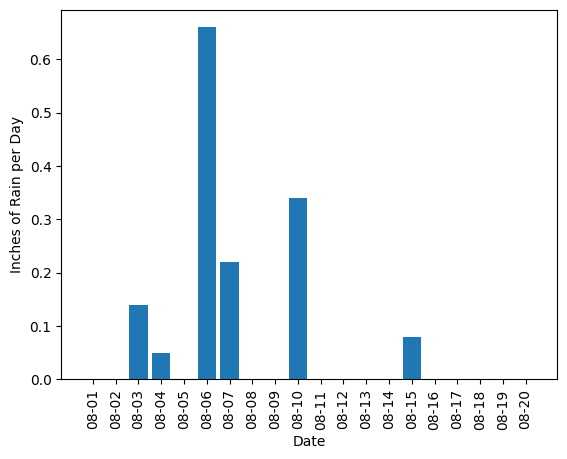

In [75]:
### Plot the Rain Data for Haw River
fig, ax = plt.subplots()
plt.bar(HRrainData.index.strftime('%m-%d'),HRrainData['00045_Sum'])
plt.xlabel('Date')
plt.ylabel('Inches of Rain per Day')
plt.xticks(rotation=90)
plt.show()

Lets Compare the Cumulative Rainfall at the Haw River Station to a Nearby Rain Gauge.

We will use the Raingage at Booker Creek in Chapel Hill. See here: https://waterdata.usgs.gov/monitoring-location/355631079025645/#parameterCode=00045&period=P7D

In [79]:
### Booker Creek at Chapel Hill, NC
BCSiteID = '355631079025645'
BCSite = nwis.get_record(sites=BCSiteID, service='site')
print(BCSite)

  agency_cd          site_no  \
0      USGS  355631079025645   

                                          station_nm site_tp_cd     lat_va  \
0  RAINGAGE AT BOOKER CR AT SR 1751 NR CHAPEL HIL...         AT  355631.19   

     long_va  dec_lat_va  dec_long_va coord_meth_cd coord_acy_cd  ...  \
0  790256.52   35.941997   -79.049033             N            S  ...   

  local_time_fg reliability_cd  gw_file_cd  nat_aqfr_cd  aqfr_cd aqfr_type_cd  \
0             Y            NaN         NaN          NaN      NaN          NaN   

   well_depth_va hole_depth_va  depth_src_cd  project_no  
0            NaN           NaN           NaN         NaN  

[1 rows x 42 columns]


We want to compare the rainfall amounts for longer periods of time so we'll change the start and end dates as well.

In [106]:
### Dates for Start and End of Data
startDate = '2021-08-20'
endDate = '2023-08-20'

HRrainData = nwis.get_record(sites=HRSiteID, service=dataType, start=startDate, end=endDate, parameterCd=param)
BCrainData = nwis.get_record(sites=BCSiteID, service=dataType, start=startDate, end=endDate, parameterCd=param)

In [107]:
### Calculate Cumulative Summation for Both Locations
HRsum = HRrainData['00045_Sum'].cumsum()
BCsum = BCrainData['00045_Sum'].cumsum()


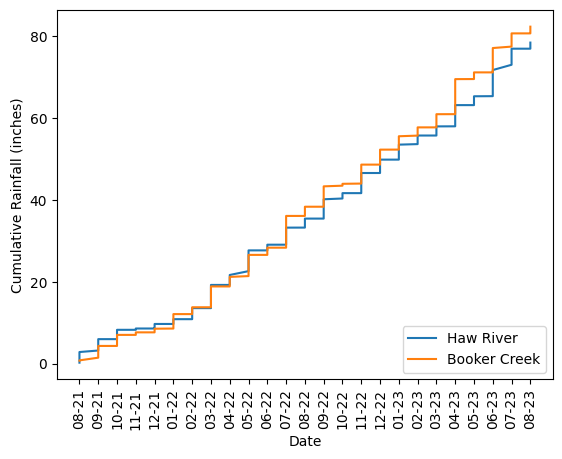

In [108]:
### Plot the Cumulative Rainfall Amounts
fig, ax = plt.subplots()
plt.plot(HRrainData.index.strftime('%m-%y'),HRsum,label = "Haw River")
plt.plot(BCrainData.index.strftime('%m-%y'),BCsum,label = "Booker Creek")
plt.xlabel('Date')
plt.ylabel('Cumulative Rainfall (inches)')
plt.xticks(rotation=90)
plt.legend(loc='lower right')
plt.show()